# ВКР по курсу «Data Science PRO» Пронкин Сергей Игоревич

ОПИСАНИЕ ЗАДАНИЯ:
* В ходе выполнения ВКР требуется сделать:
* Изучить теоретические основы и методы решения поставленной задачи.
* Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.
* Провести предобработку данных (удаление шумов, нормализация и т.д.).
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 
* Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
* Оценить точность модели на тренировочном и тестовом датасете. 
* Создать репозиторий в GitHub и разместить там код исследования. 
* Оформить файл README.

## ТЕОРЕТИЧЕСКАЯ ОСНОВА

> Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов).
> 
> Описание: 
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. 
> 
> При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. 
> 
> Их свойства определяются входящими в них компонентами, но отличаются от свойств компонентов, взятых в отдельности.
> 
> Композиционные материалы состоят из матрицы (основы) и наполнителя.
> 
> Матрица связывает композицию и в большей степени определяет технологические режимы получения материала и его эксплуатационные характеристики: рабочую температуру, плотность, удельную прочность, предел усталости.
> 
> Наполнитель, как правило, имеет высокие значения прочности, твердости и модуля упругости — значительно большие, чем показатели матрицы. Поэтому наполнитель является армирующим или упрочняющим элементом.
> 
> Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. 
> 
> Даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента). Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
> 
> Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).

## РАЗВЕДКА ДАННЫХ

В этом разделе необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонке получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

> Имеется датасет со свойствами композита. Рассматривается базальтопластик с нашивками из углепластика.
>
> На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 
>
> На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.
>
> Датасет состоит из двух файлов - X_bp (составляющая из базальтопластика) и Х_nup (составляющая из углепластика). Дано, что объединение делать по индексу тип объединения INNER.

In [1]:
# Подключаю доступ к файлам данных для гугл драйв
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Пути для гугл драйв
# nb_path = '/content/drive/MyDrive/Colab Notebooks/'
# data_path = '/content/drive/MyDrive/Colab Notebooks/data/'
# models_path = '/content/drive/MyDrive/Colab Notebooks/models/'

In [3]:
# Пути для локального запуска
# nb_path = ''
# data_path = '../data/'
# models_path = '../models/'

In [1]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle

In [74]:
# Модели машинного обучения

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [76]:
# Еще  библиотеки
from pandas import read_excel, DataFrame, Series
from numpy.random import seed
from scipy import stats
import warnings

In [2]:
# Импорт библиотеки TensorFlow
import tensorflow as tf
from tensorflow import keras


In [3]:
# Проверка версии библиотеки
print(tf.__version__) 

2.18.0


In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
! pip install jinja2


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)


In [45]:
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler

In [72]:
from sklearn.pipeline import Pipeline

In [7]:
# Определяю RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 1809

In [8]:
# Загрузка исходные данные из файла X_bp
X_bp = pd.read_excel('X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

In [10]:
# Загрузка исходные данные из файла X_nup
X_nup = pd.read_excel('X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

X_bp содержит индекс + 10 признаков и 1023 строк.

X_nup содержит индекс + 3 признака и 1040 строк

## Список признаков

In [11]:
# Признаки для базальтопластика
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

X_bp признаки
0       Соотношение матрица-наполнитель
1                      Плотность, кг/м3
2                 модуль упругости, ГПа
3           Количество отвердителя, м.%
4       Содержание эпоксидных групп,%_2
5              Температура вспышки, С_2
6         Поверхностная плотность, г/м2
7  Модуль упругости при растяжении, ГПа
8         Прочность при растяжении, МПа
9               Потребление смолы, г/м2

In [12]:
# Признаки для Углепластика
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

X_nup признаки
0  Угол нашивки, град
1         Шаг нашивки
2   Плотность нашивки

## Объединение датасетов с типом INNER 
Ожидаю, что  должно остаться не более 1023 строк

In [14]:
df = X_bp.join(X_nup, how='inner')
df.shape

(1023, 13)

In [15]:
# Сохраню объединенные данные
df.to_excel('data_merged.xlsx')

Объедененный датасет готов к проведению анализа.

## Изучение  данных

In [16]:
# Посмотрю типы данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

Вывод: Признаков с  типом object в датасете нет! DATA сет хорошо подготовлен

In [17]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [21]:
# Посмотрю описательную статистику
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=4)

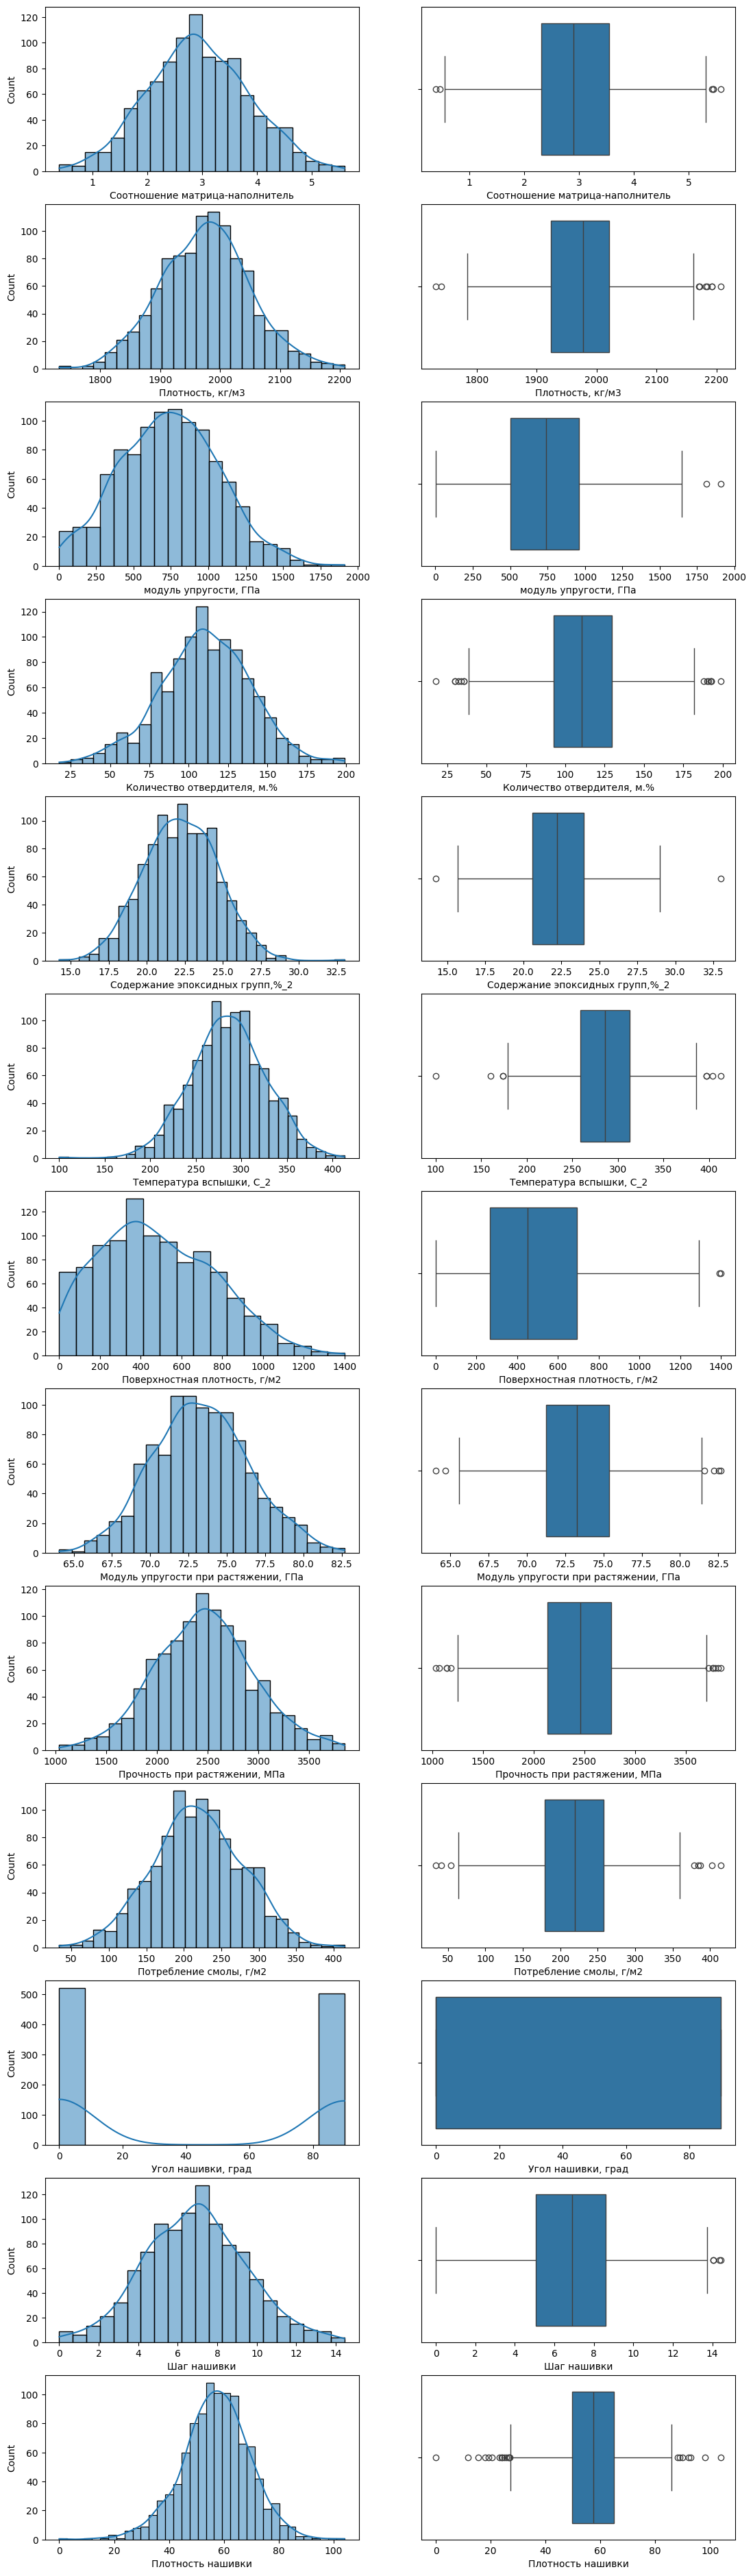

In [22]:
# Построю графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение.
Они количественные, вещественные. Принимают неотрицательные значения.

"Угол нашивки, град" принимает 2 значения. Нужно превратить в бинарный признак.

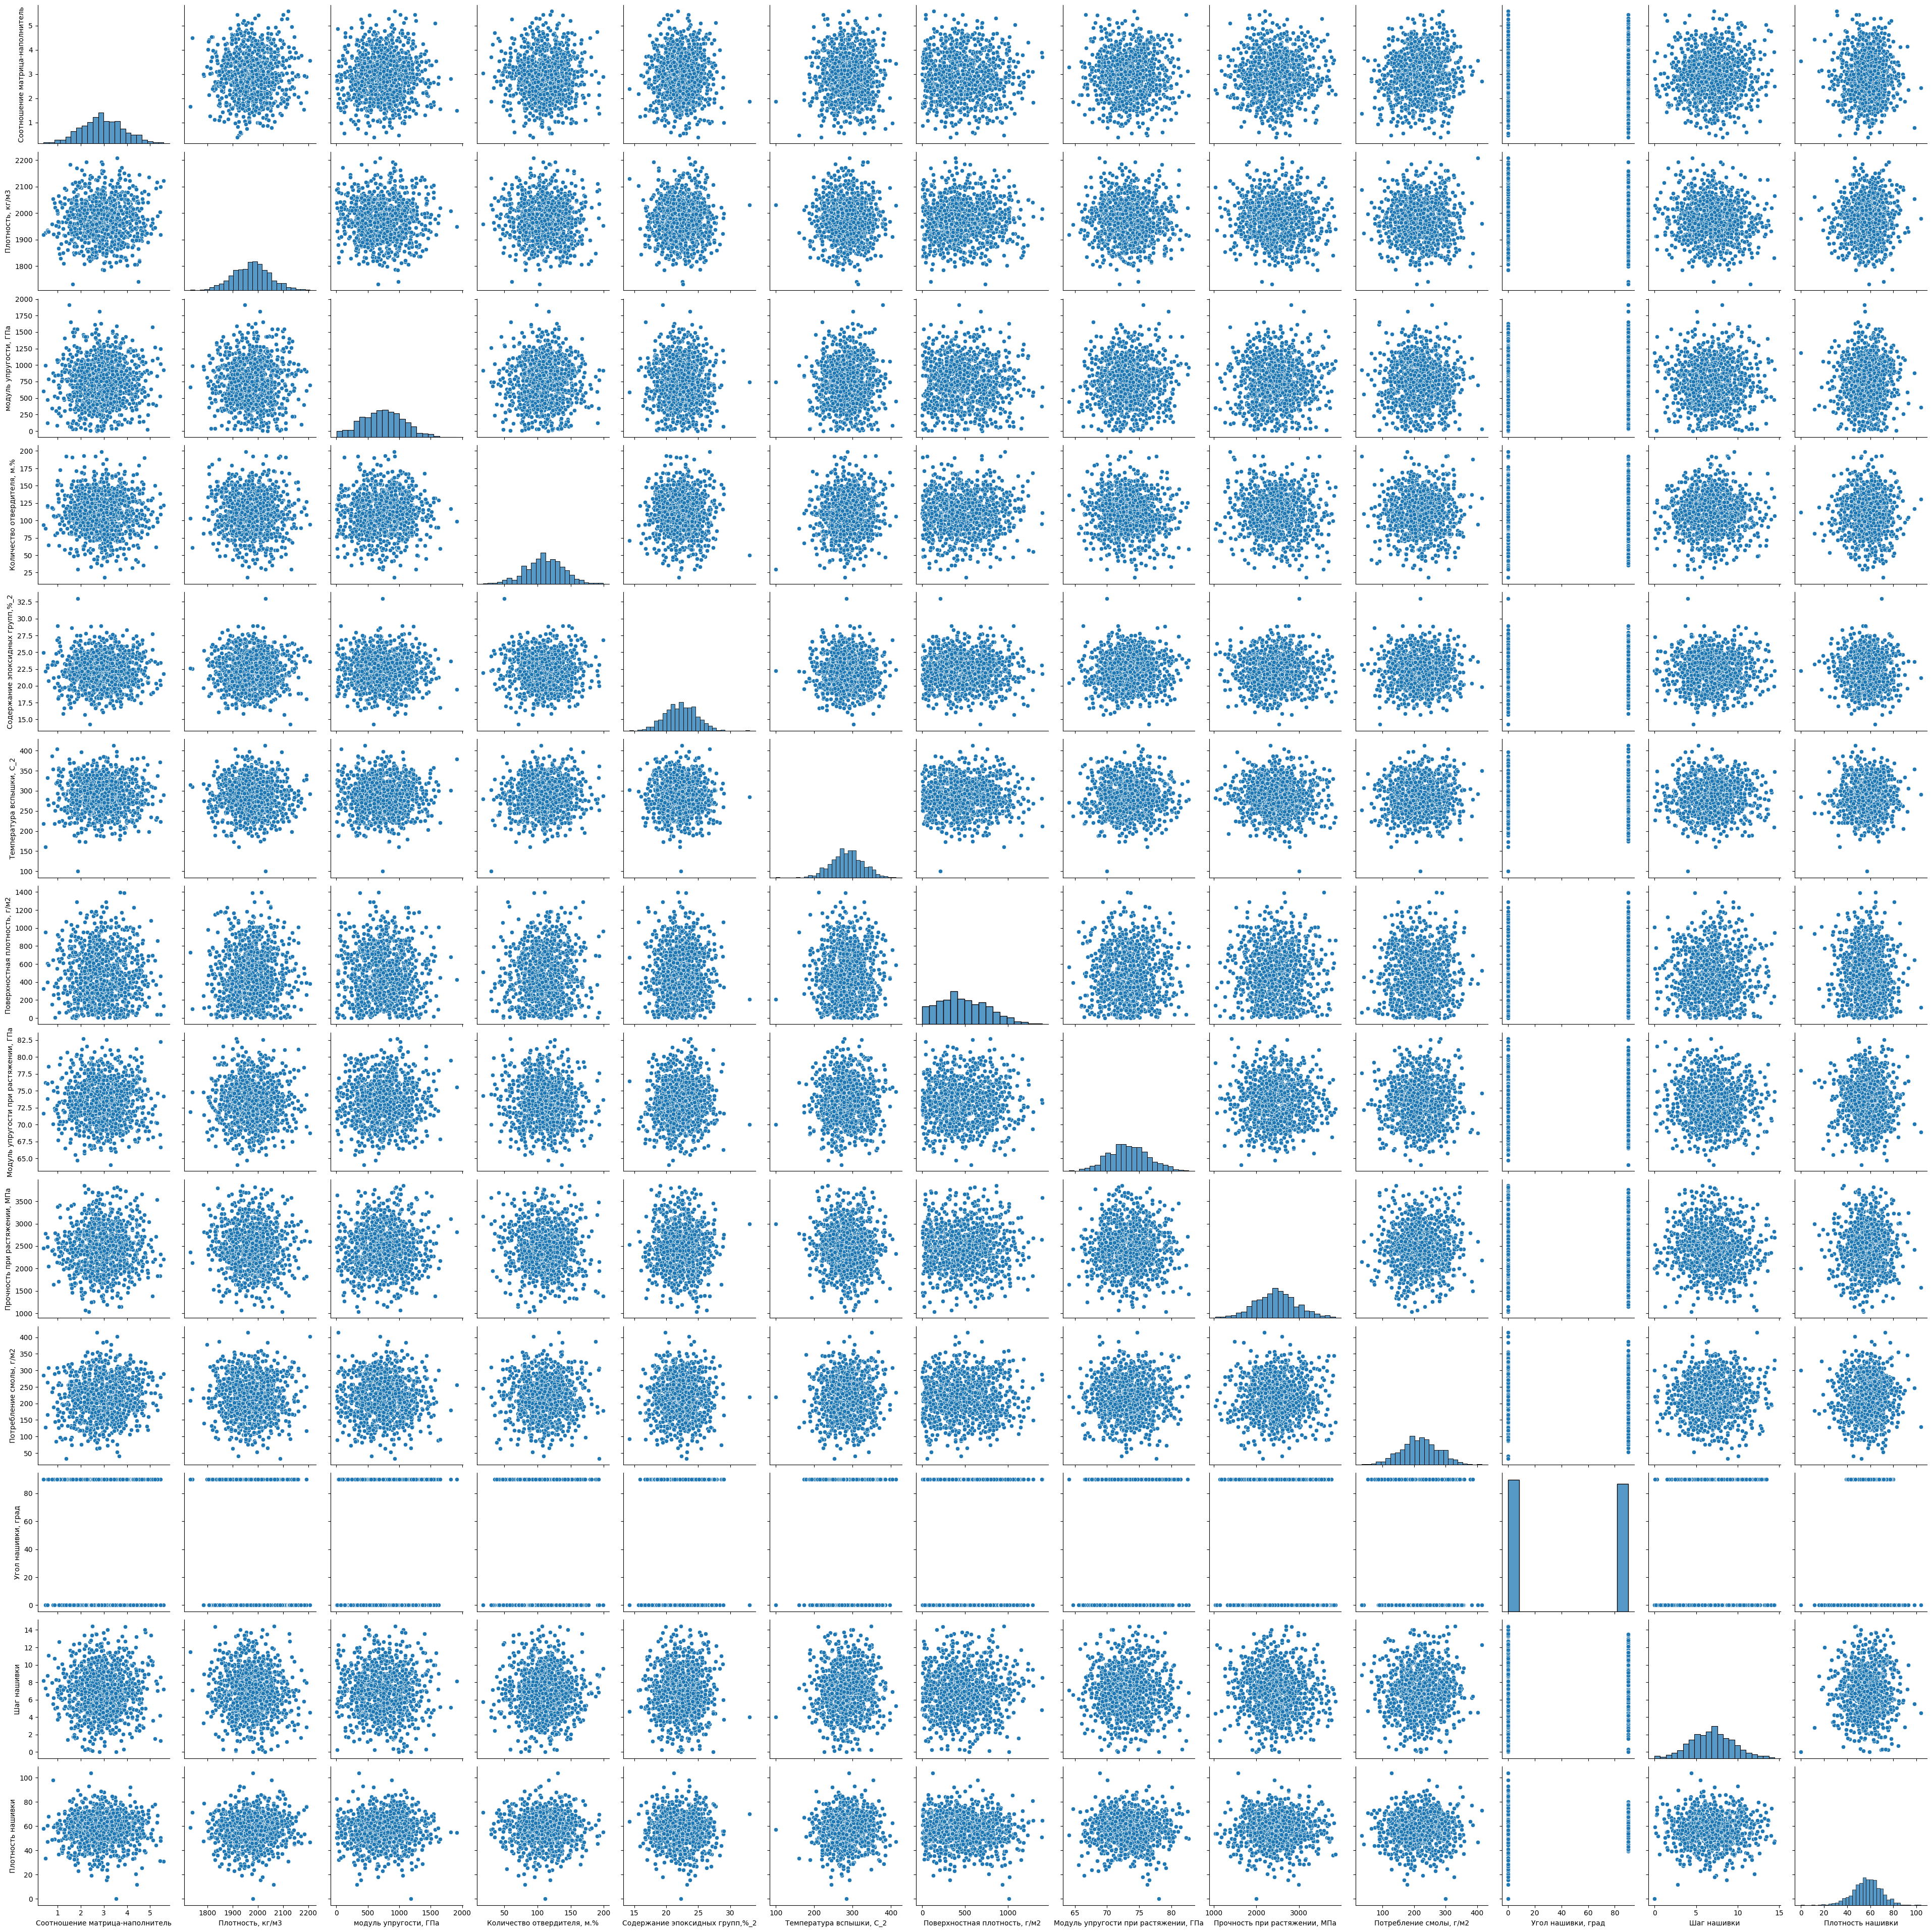

In [23]:
# Построю попарные графики рассеяния
sns.pairplot(df, height=3);

Матрица корреляции

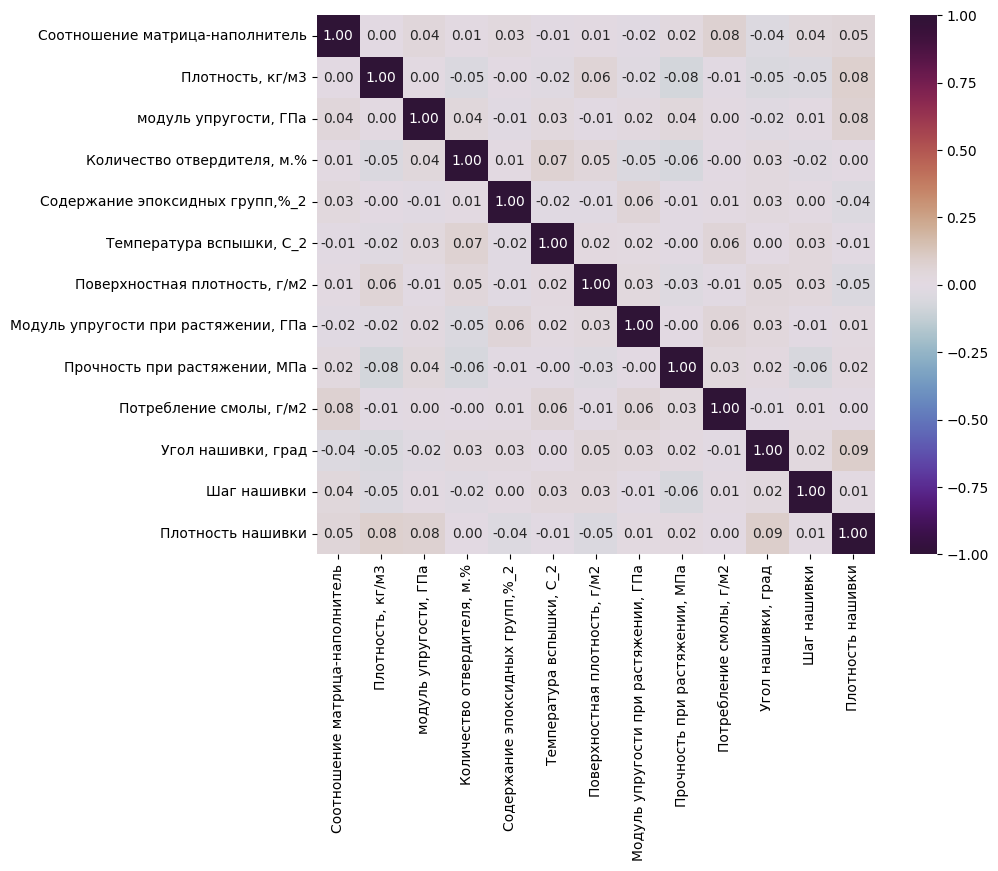

In [35]:
# Попробую рассмотреть матрицу корреляции.
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Корреляция между метриками  почти нулевая. Фактически между признаками нет линейной зависимости. Уже можно сделать предположение  о том, что методы линейной регресси не  дадут  хорошего результата.

##  Поиск выбросов
Исходя  из полученных  данных явно видно, что по части метрик выбросы существуют.  Для оптимального построения модели нужно проработать вопрос корректировки\исключения выбросов.

1. Метод межквартильных расстояний

Соотношение матрица-наполнитель: iq=6


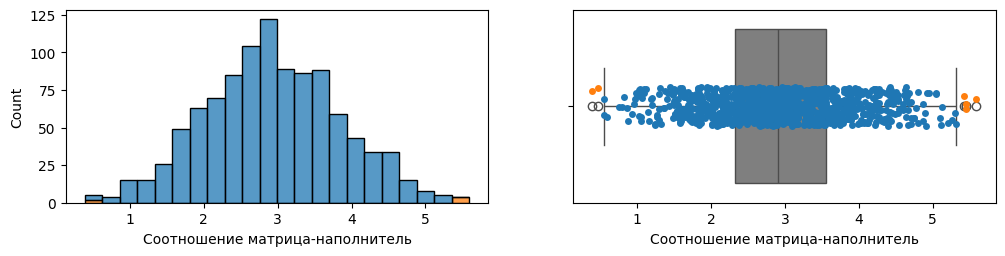

Плотность, кг/м3: iq=9


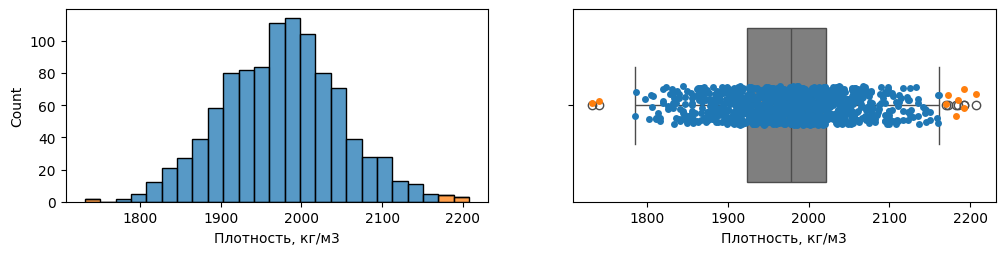

модуль упругости, ГПа: iq=2


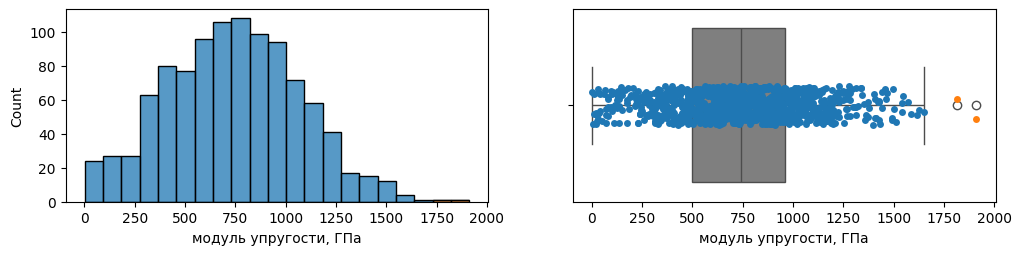

Количество отвердителя, м.%: iq=14


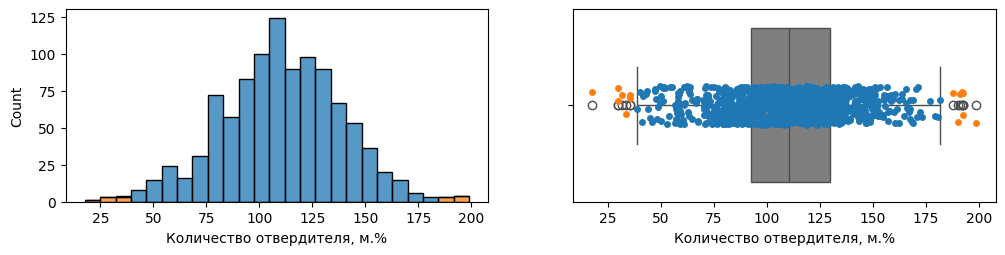

Содержание эпоксидных групп,%_2: iq=2


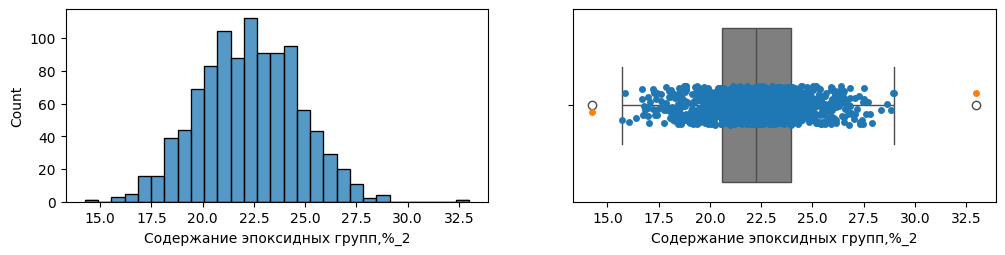

Температура вспышки, С_2: iq=8


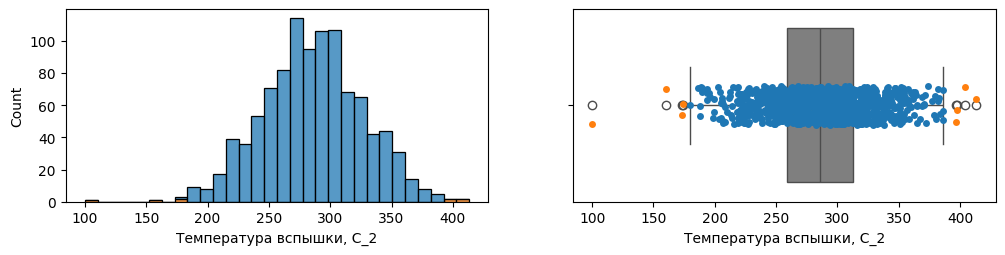

Поверхностная плотность, г/м2: iq=2


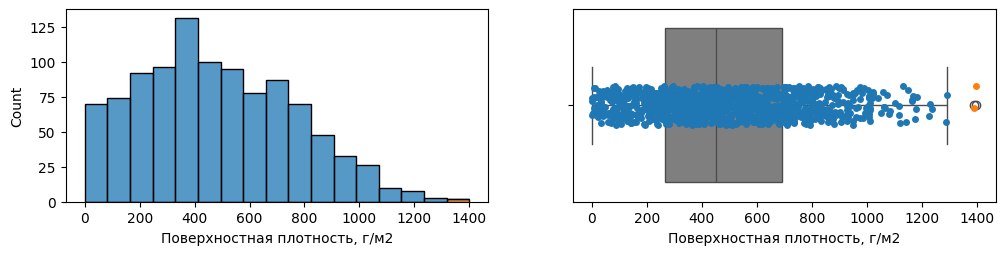

Модуль упругости при растяжении, ГПа: iq=6


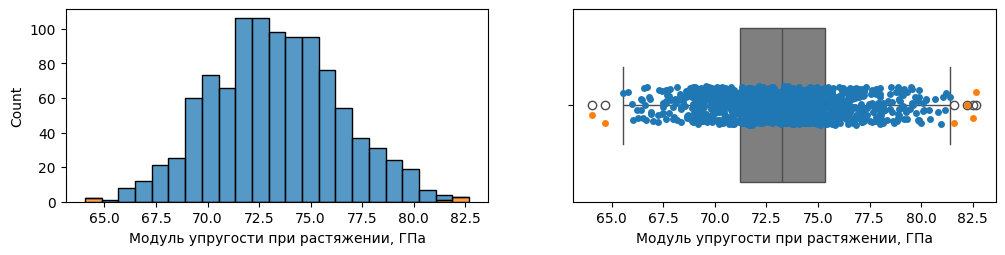

Прочность при растяжении, МПа: iq=11


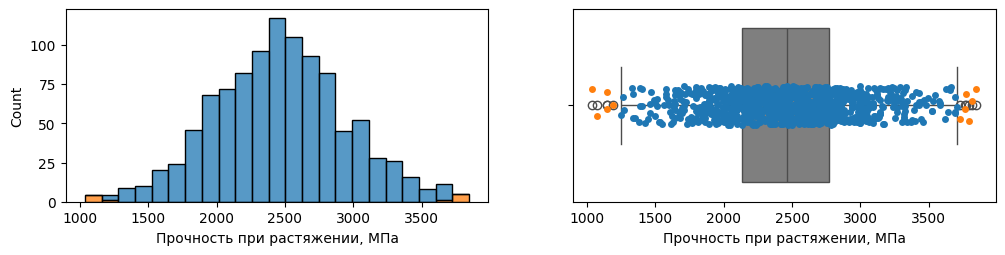

Потребление смолы, г/м2: iq=8


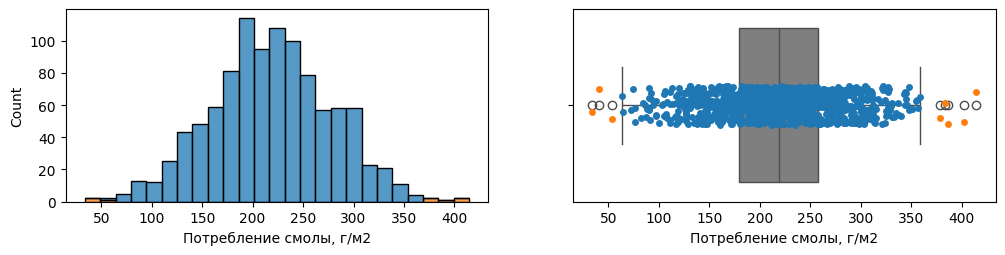

Угол нашивки, град: iq=0


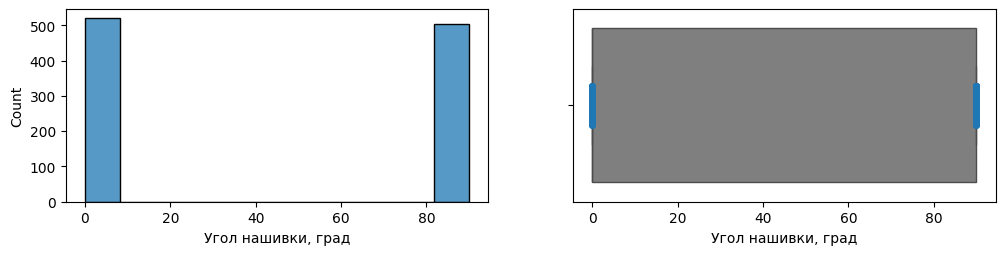

Шаг нашивки: iq=4


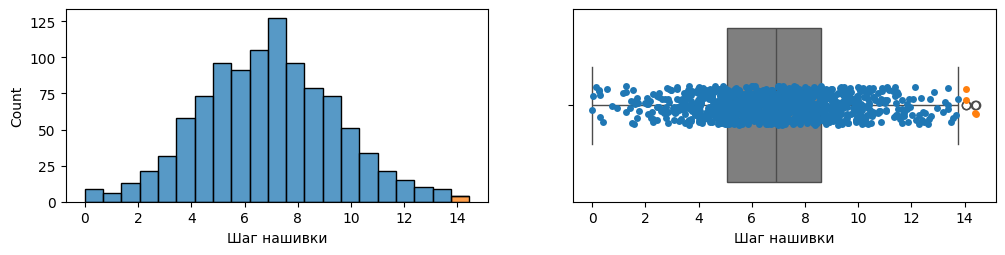

Плотность нашивки: iq=21


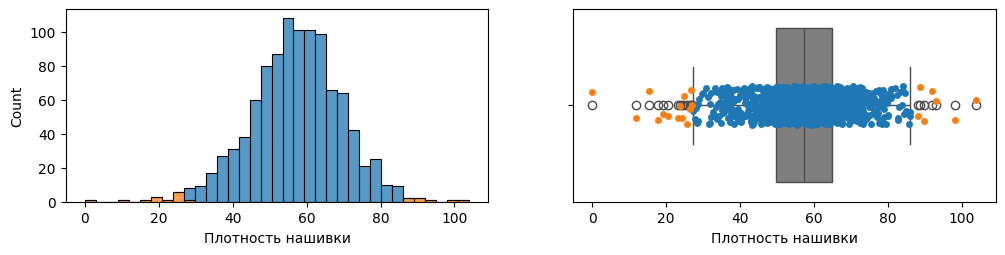

Метод межквартильных расстояний, выбросов: 93


In [30]:
# методом межквартильных расстояний
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: iq={}'.format(column, d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='iq', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод межквартильных расстояний, выбросов:', count_iq)

### Методом межквартильных расстояний определено 93 выброса

### 2. Метод 3-х сигм

Соотношение матрица-наполнитель: 3s=0


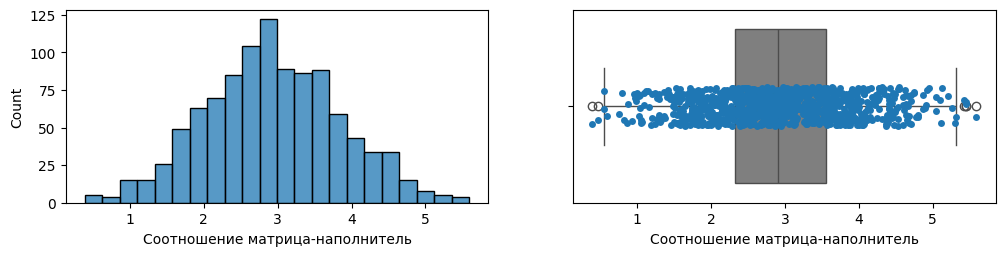

Плотность, кг/м3: 3s=3


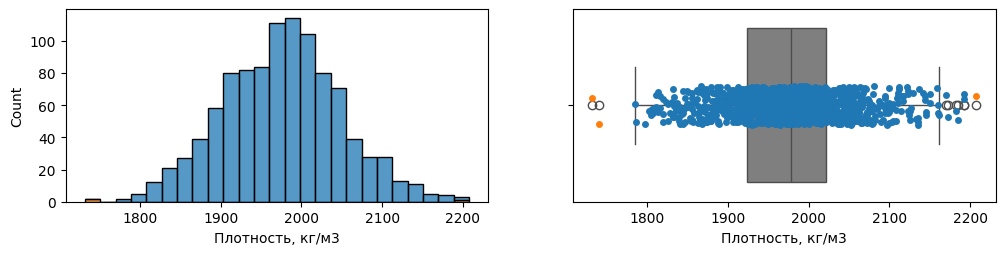

модуль упругости, ГПа: 3s=2


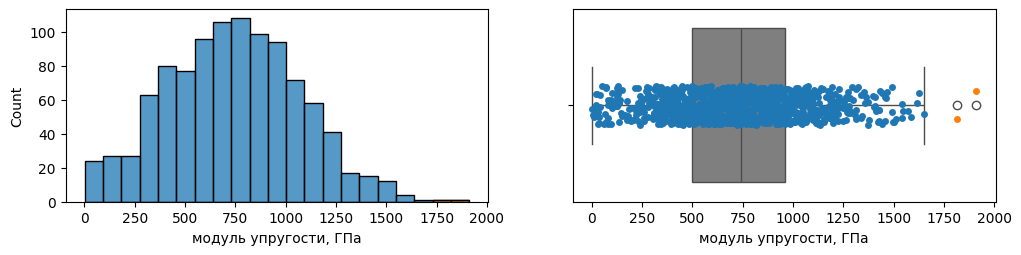

Количество отвердителя, м.%: 3s=2


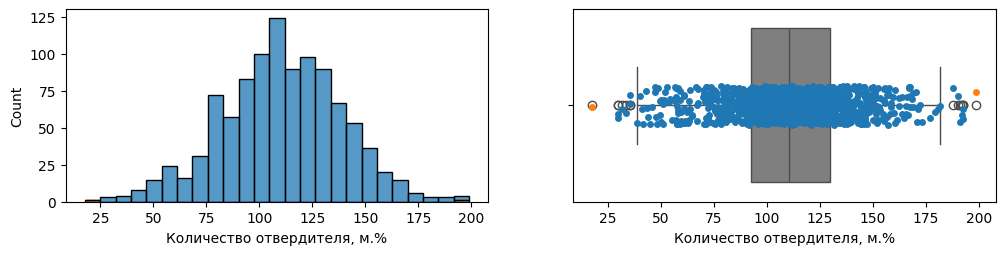

Содержание эпоксидных групп,%_2: 3s=2


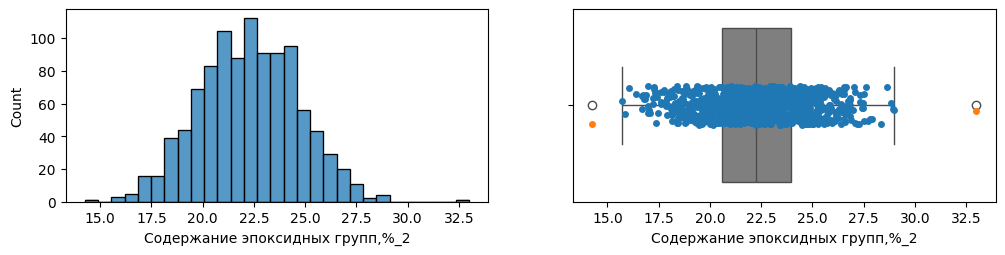

Температура вспышки, С_2: 3s=3


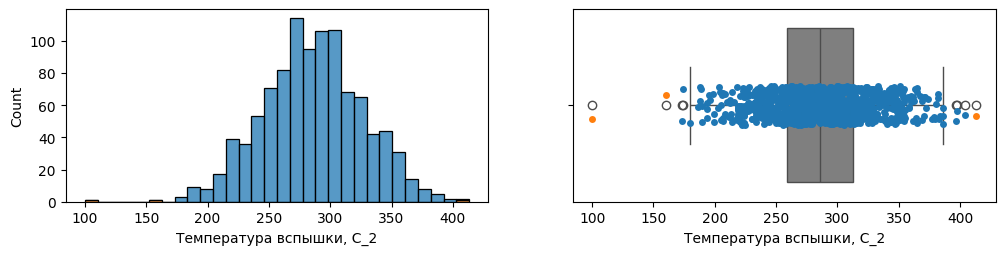

Поверхностная плотность, г/м2: 3s=2


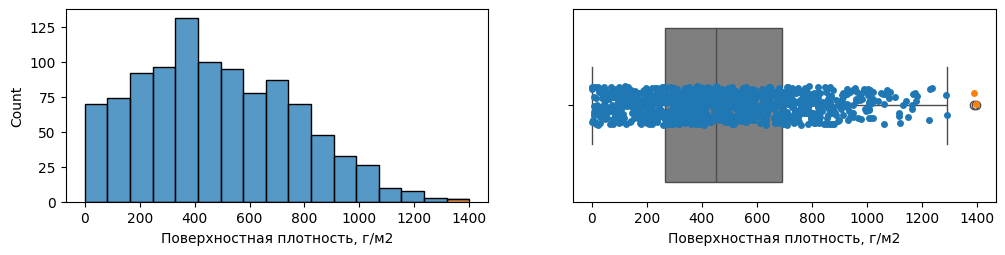

Модуль упругости при растяжении, ГПа: 3s=0


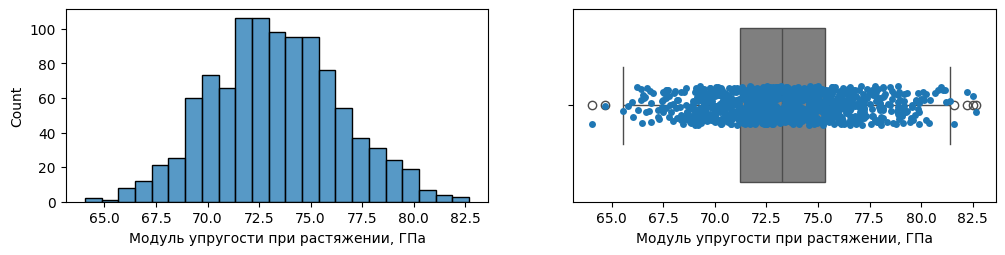

Прочность при растяжении, МПа: 3s=0


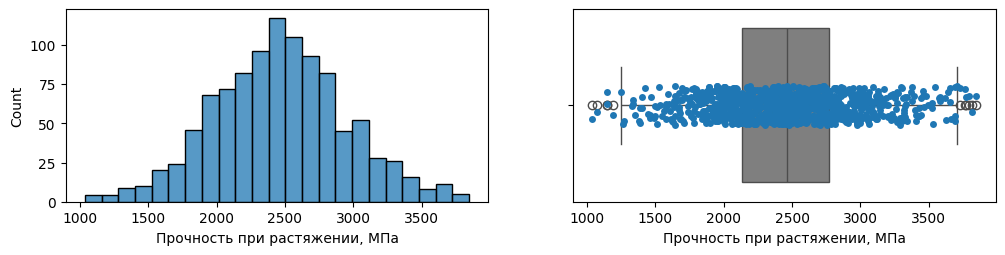

Потребление смолы, г/м2: 3s=3


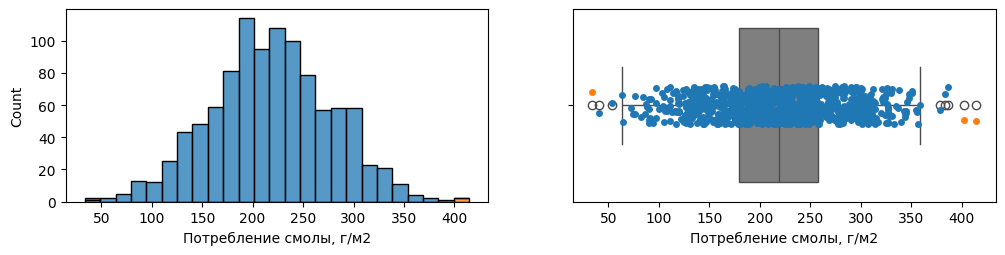

Угол нашивки, град: 3s=0


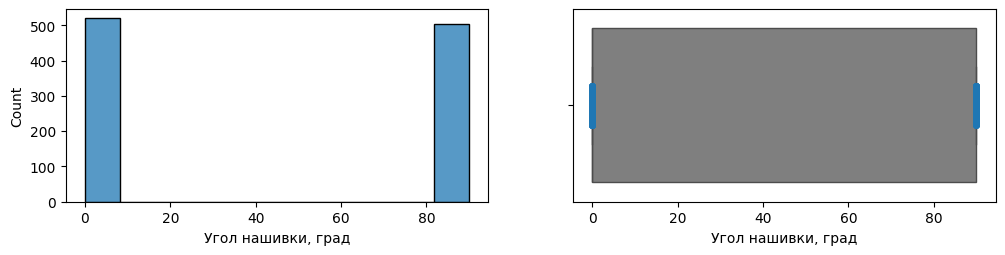

Шаг нашивки: 3s=0


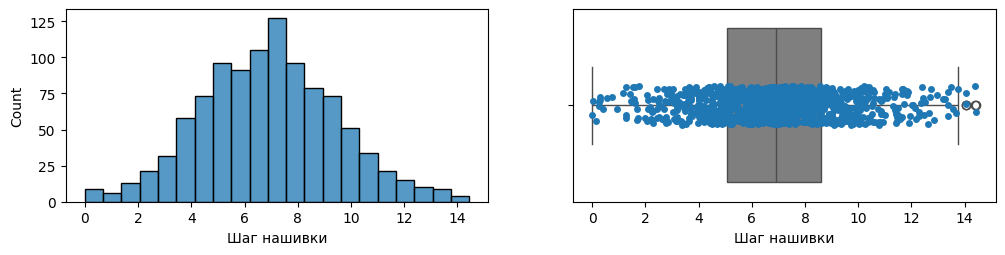

Плотность нашивки: 3s=7


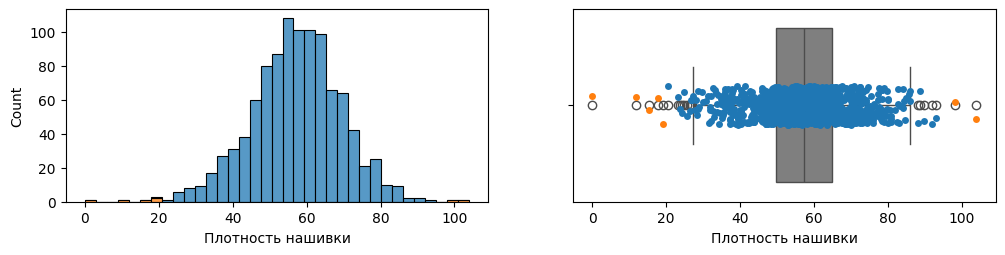

Метод 3-х сигм, выбросов: 24


In [32]:
count_3s = 0

for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()

    # визуализация выбросов
    print('{}: 3s={}'.format(column, d['3s'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['3s']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['3s']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)

### Методом 3-x Сигм определено 24 выброса

### ВЫВОД: Выбираю метод межквартильных расстояний, так как с его помощью можно исключить максимальное количество выбросов. 
Это конечно может повлиять на качество  данных, но все же считаю, что выбросы  нужно исключить

## Удаление выбросов

In [ ]:
# Удалить выбросы методом 3-х сигм
# outliers = pd.DataFrame(index=df.index)
# for column in df:
    # zscore = (df[column] - df[column].mean()) / df[column].std()
    # outliers[column] = (zscore.abs() > 3)
# df = df[outliers.sum(axis=1)==0]
# df.shape

In [33]:
# Удаление выбросов методом межквартильных расстояний
outliers = pd.DataFrame(index=df.index)
for column in df:
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers[column] = ((df[column] <= lower) | (df[column] >= upper))
    ## count_iq += d['iq'].sum()
df = df[outliers.sum(axis=1)==0]
df.shape

(936, 13)

In [34]:
# сохраняем очищенные данные
df.to_excel('data_cleaned_psi.xlsx')

In [36]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [37]:
# Анализируем количество пропусков в данных, чтобы удостовериться, что выбросы были корректно помечены как NaN
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Все отлично!  Null-значений не  обнаружено!

In [38]:
# Просматриваем информацию о "очищенном" датасете после удаления выбросов, чтобы удостовериться, что данные были корректно обработаны.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    int64  
 11  Шаг нашивки            

In [42]:
df.sample(5)

Соотношение матрица-наполнитель  Плотность, кг/м3  \
47                           1.298167       1984.511373   
1002                         2.195568       2076.471296   
48                           2.134446       1986.349053   
388                          3.666993       2019.574351   
454                          2.971155       2098.475039   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
47              1405.786822                   130.942798   
1002             180.945421                   114.926148   
48               809.293804                    95.089022   
388              566.801799                   108.053040   
454             1046.534488                    76.238582   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
47                          21.829240                288.952099   
1002                        22.587418                285.319055   
48                          19.364926                205.499761   
388                         24.317107                327.219188   
454                         22.571862                230.635311   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
47                       161.007718                             74.680913   
1002                     712.126880                             70.780802   
48                       196.357643                             76.340207   
388                      443.686026                             80.114266   
454                      548.214615                             71.844822   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
47                      2526.814256               228.867720   
1002                    1966.671431               288.552218   
48                      2459.524526               289.957142   
388                     3320.951281               219.198882   
454                     2355.323234               281.413769   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
47                     0     8.946891          72.084594  
1002                  90     5.224174          62.265683  
48                     0     3.746625          57.997772  
388                    0     7.303776          52.922258  
454                    0     9.337655          48.015465

In [41]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    int64  
 11  Шаг нашивки            

In [43]:
df.describe(include='all')

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       936.000000        936.000000   
mean                          2.925683       1974.040023   
std                           0.893712         70.808120   
min                           0.547391       1784.482245   
25%                           2.321931       1923.443748   
50%                           2.904731       1977.258043   
75%                           3.546650       2020.158764   
max                           5.314144       2161.565216   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             936.000000                   936.000000   
mean              738.247627                   110.916216   
std               328.708665                    27.037891   
min                 2.436909                    38.668500   
25%               498.577158                    92.523816   
50%               738.736842                   111.113175   
75%               958.418993                   130.001450   
max              1649.415706                   181.828448   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       936.000000                936.000000   
mean                         22.209030                286.040414   
std                           2.394871                 39.400677   
min                          15.695894                179.374391   
25%                          20.571516                259.184486   
50%                          22.184713                286.024118   
75%                          23.961818                312.991425   
max                          28.955094                386.067992   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     936.000000                            936.000000   
mean                      482.993901                             73.305127   
std                       280.190377                              3.037381   
min                         0.603740                             65.553336   
25%                       266.004099                             71.248823   
50%                       457.732246                             73.259230   
75%                       695.900862                             75.310788   
max                      1291.340115                             81.417126   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     936.000000               936.000000   
mean                     2467.488822               217.613374   
std                       463.838911                57.827255   
min                      1250.392802                63.685698   
25%                      2146.936034               179.489091   
50%                      2457.959767               218.388715   
75%                      2755.169485               256.396777   
max                      3705.672523               359.052220   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          936.000000   936.000000         936.000000  
mean            46.057692     6.915585          57.451895  
std             45.011619     2.509672          11.239331  
min              0.000000     0.037639          27.272928  
25%              0.000000     5.134988          50.209656  
50%             90.000000     6.943337          57.584225  
75%             90.000000     8.591450          64.798211  
max             90.000000    13.732404          86.012427

Видим, что ряд метрик  (плотность, упругость и пр.) имеют  большой разброс значений.  Нужна  Нормализация!

Соотношение матрица-наполнитель: iq=0


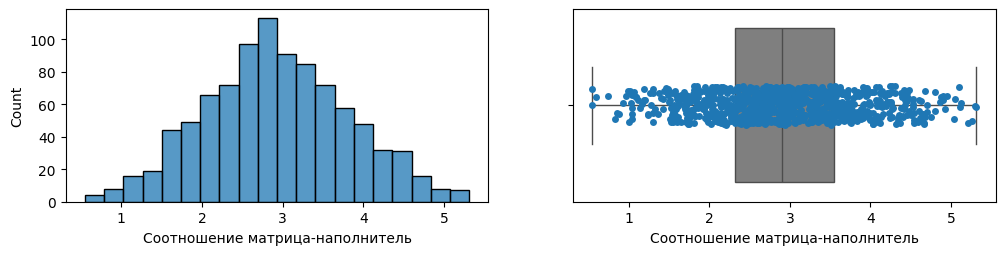

Плотность, кг/м3: iq=0


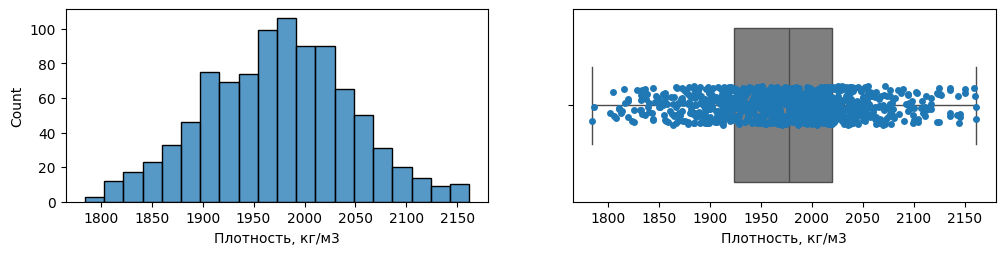

модуль упругости, ГПа: iq=1


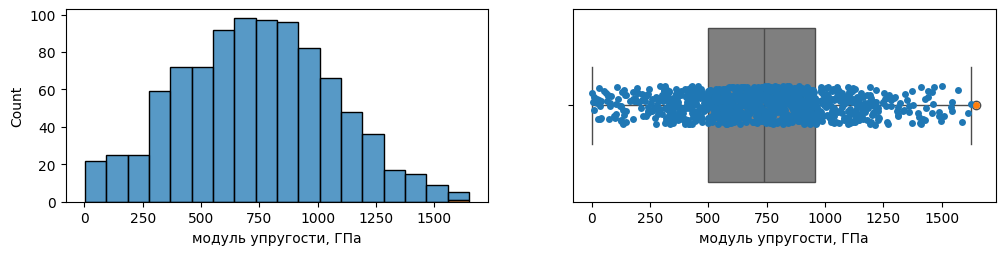

Количество отвердителя, м.%: iq=0


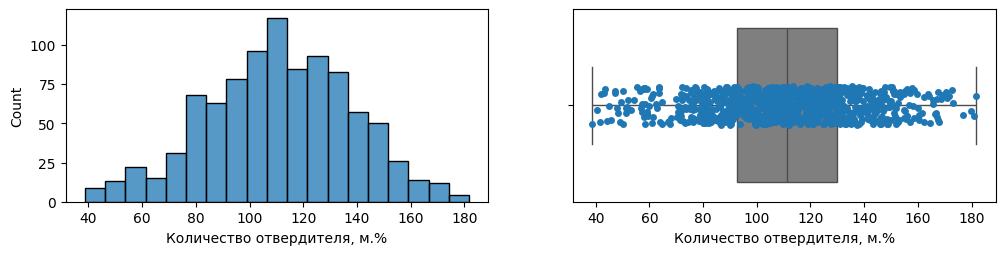

Содержание эпоксидных групп,%_2: iq=0


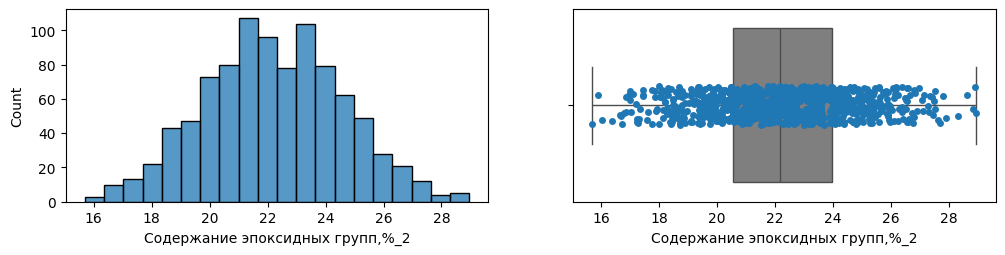

Температура вспышки, С_2: iq=0


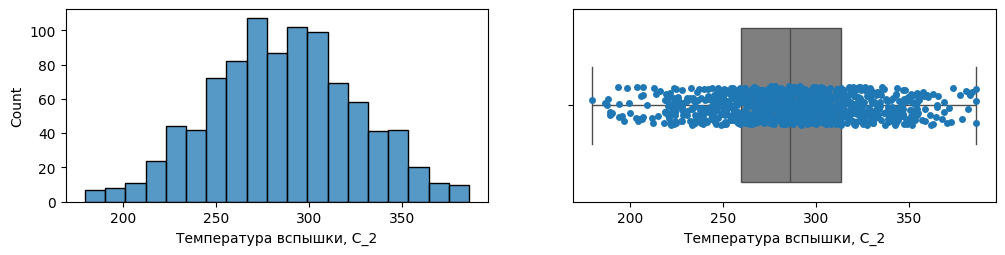

Поверхностная плотность, г/м2: iq=0


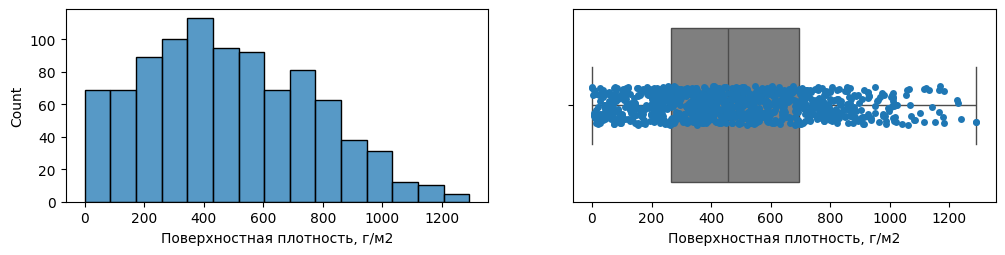

Модуль упругости при растяжении, ГПа: iq=1


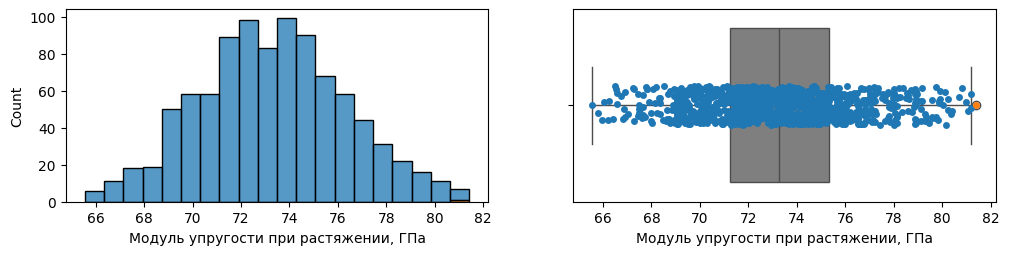

Прочность при растяжении, МПа: iq=4


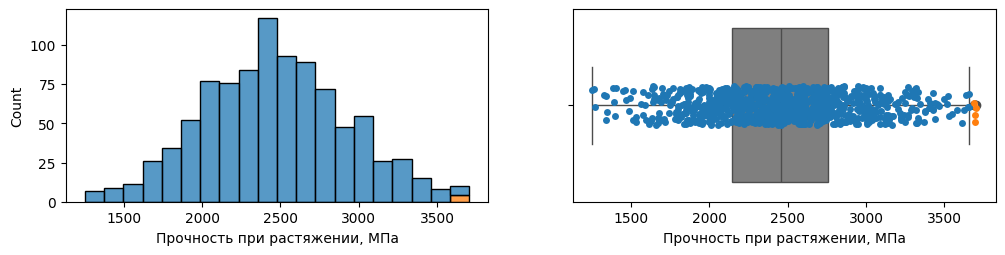

Потребление смолы, г/м2: iq=1


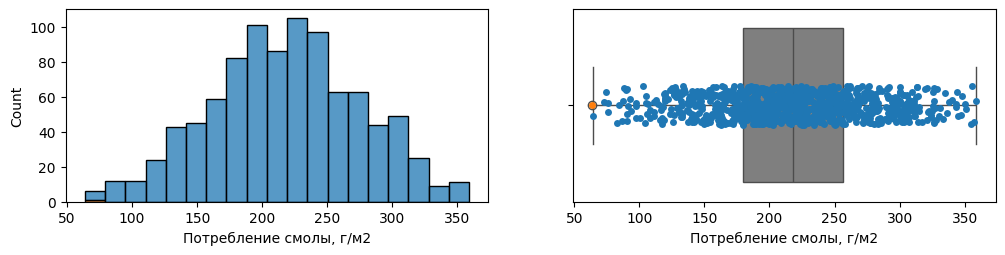

Угол нашивки, град: iq=0


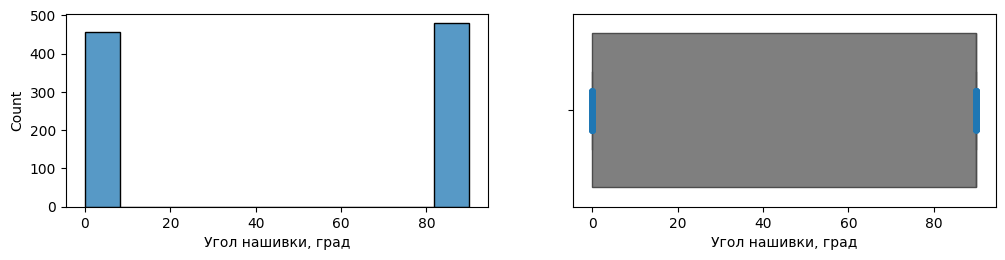

Шаг нашивки: iq=0


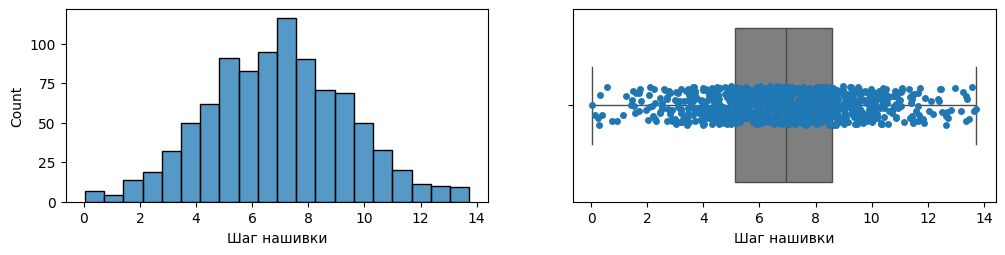

Плотность нашивки: iq=3


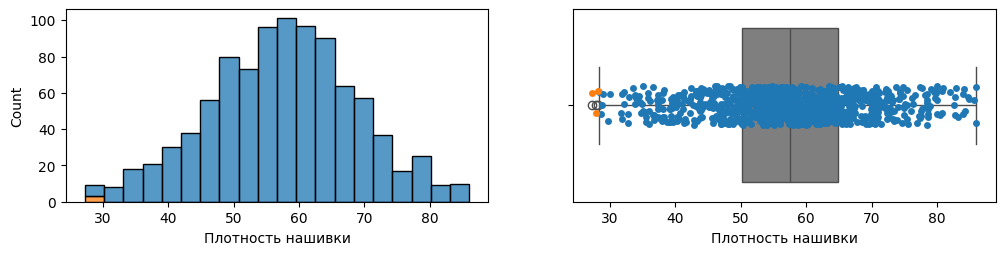

Метод межквартильных расстояний, выбросов: 10


In [39]:
# Проверяем как выглядят box-plot-ы после устранения выбросов
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: iq={}'.format(column, d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='iq', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод межквартильных расстояний, выбросов:', count_iq)

Получился вполне приемлемый результат!

## Нормализация данных.  MinMaxScaler

In [56]:
# Загрузить данные, подготовленные на предыдущем шаге
df = pd.read_excel('data_cleaned_psi.xlsx', index_col=0)
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [57]:
MinMax = MinMaxScaler()

In [58]:
df_norm = df.copy()
## копия  для  нормализации

In [60]:
df_norm [df_norm.columns] = MinMax.fit_transform(df_norm)

In [61]:
df_norm.describe(include='all')

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       936.000000        936.000000   
mean                          0.498933          0.502695   
std                           0.187489          0.187779   
min                           0.000000          0.000000   
25%                           0.372274          0.368517   
50%                           0.494538          0.511229   
75%                           0.629204          0.624999   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             936.000000                   936.000000   
mean                0.446764                     0.504664   
std                 0.199583                     0.188865   
min                 0.000000                     0.000000   
25%                 0.301243                     0.376190   
50%                 0.447061                     0.506040   
75%                 0.580446                     0.637978   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       936.000000                936.000000   
mean                          0.491216                  0.516059   
std                           0.180620                  0.190624   
min                           0.000000                  0.000000   
25%                           0.367716                  0.386128   
50%                           0.489382                  0.515980   
75%                           0.623410                  0.646450   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     936.000000                            936.000000   
mean                        0.373733                              0.488647   
std                         0.217078                              0.191466   
min                         0.000000                              0.000000   
25%                         0.205619                              0.359024   
50%                         0.354161                              0.485754   
75%                         0.538683                              0.615077   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     936.000000               936.000000   
mean                        0.495706                 0.521141   
std                         0.188915                 0.195781   
min                         0.000000                 0.000000   
25%                         0.365149                 0.392067   
50%                         0.491825                 0.523766   
75%                         0.612874                 0.652447   
max                         1.000000                 1.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          936.000000   936.000000         936.000000  
mean             0.511752     0.502232           0.513776  
std              0.500129     0.183258           0.191342  
min              0.000000     0.000000           0.000000  
25%              0.000000     0.372211           0.390482  
50%              1.000000     0.504258           0.516029  
75%              1.000000     0.624604           0.638842  
max              1.000000     1.000000           1.000000

In [62]:
# Получаем асимметрию по всем колонкам
skewness = df_norm.skew()
print("Асимметрия по всем признакам:")
print(skewness)

Асимметрия по всем признакам:
Соотношение матрица-наполнитель         0.058917
Плотность, кг/м3                        0.002822
модуль упругости, ГПа                   0.083489
Количество отвердителя, м.%            -0.120959
Содержание эпоксидных групп,%_2         0.027075
Температура вспышки, С_2                0.007521
Поверхностная плотность, г/м2           0.357603
Модуль упругости при растяжении, ГПа    0.113901
Прочность при растяжении, МПа           0.106828
Потребление смолы, г/м2                -0.037592
Угол нашивки, град                     -0.047097
Шаг нашивки                             0.051818
Плотность нашивки                      -0.079965
dtype: float64


Коэффициента ассиметриии больше 1 не наблюдается. Это не плохо!

In [64]:
df_norm.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

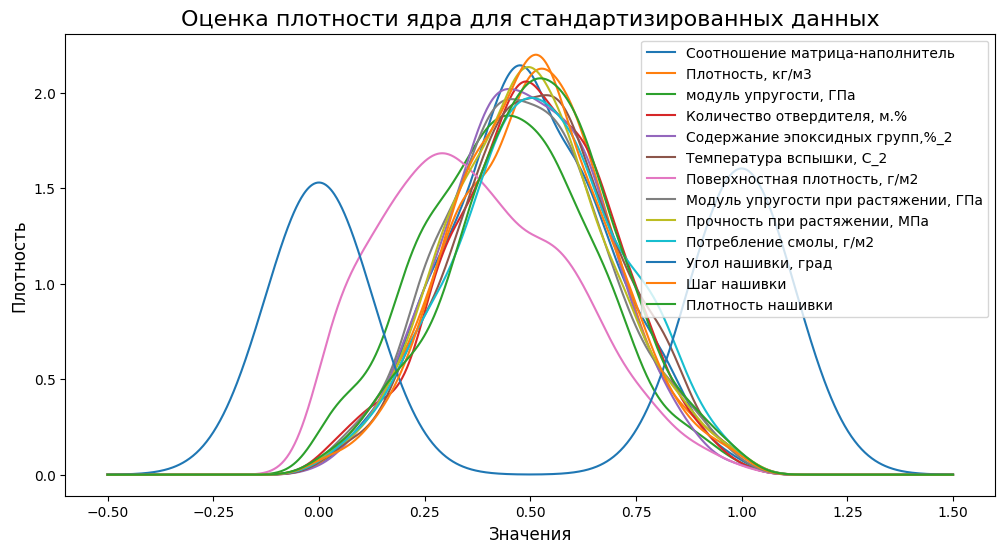

In [65]:
# Создаем график KDE (оценка плотности ядра) для нормализованных данных df_norm
fig, ax = plt.subplots(figsize=(12, 6))

# Строим график плотности распределения для каждого признака
df_norm.plot(kind='kde', ax=ax)

# Настроим заголовок и метки для улучшения визуализации
plt.title("Оценка плотности ядра для стандартизированных данных", fontsize=16)
plt.xlabel("Значения", fontsize=12)
plt.ylabel("Плотность", fontsize=12)

# Показать график
plt.show()

## Модели и их применение

Цитата: "При построении моделей необходимо провести оптимизацию гиперпараметров с использованием поиска по сетке с кросс-валидацией, при этом количество блоков для проверки составляет 10."

Данные в нашем финальном датасете в основном являются непрерывными, что предполагает использование регрессионных моделей для решения задачи прогнозирования. 

ЛИНЕЙНЫХ ЗАВИСИМОСТЕЙ МЕЖДУ МАТРИКАМИ НЕ ОБНАРУЖИВАЕТСЯ! 

Буду пытаться использовать категориальные методы (например, алгоритм ближайших соседей) или методы глубокого обучения, чтобы выявить дополнительные скрытые зависимости!



### 1. Создание необходимых выборок

In [91]:
# Разделяем данные на обучающую и тестовую выборки, целевую переменную
# Целевая переменная (y) - это столбец 'Прочность при растяжении, МПа'
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    df_norm.loc[:, df_norm.columns != 'Прочность при растяжении, МПа'],
    df_norm[['Прочность при растяжении, МПа']],  
    test_size=0.3,  # 30% данных выделяется на тестирование
    random_state=RANDOM_STATE) 

In [92]:
# Размер выборок
print(f"Размер обучающей выборки X: {x_train_1.shape}")
print(f"Размер тестовой выборки X: {x_test_1.shape}")
print(f"Размер обучающей выборки y: {y_train_1.shape}")
print(f"Размер тестовой выборки y: {y_test_1.shape}")

Размер обучающей выборки X: (655, 12)
Размер тестовой выборки X: (281, 12)
Размер обучающей выборки y: (655, 1)
Размер тестовой выборки y: (281, 1)


### 2. Функция для базовой модели

In [93]:
# Функция для создания базвовой модели, которая предсказывает среднее значение целевой переменной на основе тестовой выборки
# Функция возвращает список, где  для каждого примера тестовой выборки  возвращается среднее значение целевой переменной расчитанное по всей выборке
def mean_model(y_test):
    return [np.mean(y_test) for _ in range(len(y_test))]

# Применяем функцию к тестовой выборке и сохраняем предсказания в переменную y_1_pred_psi
y_1_pred_psi = mean_model(y_test_1)

In [94]:
# Результаты модели, которая предсказывает медианное значение (baseline модель)

# MAE для базовой модели
mae_mean_target = mean_absolute_error(y_test_1, y_1_pred_psi)
# MSE для той же модели
mse_mean_target = mean_squared_error(y_test_1, y_1_pred_psi)
# RMSE для модели, которая всегда предсказывает среднее значение
rmse_mean_target = np.sqrt(mse_mean_target)

# Выводим результаты на экран
print('Base Model:')
print("MAE for mean target: ", mae_mean_target)  # Средняя абсолютная ошибка
print("MSE for mean target: ", mse_mean_target)  # Среднеквадратичная ошибка
print("RMSE for mean target: ", rmse_mean_target)  # Корень из среднеквадратичной ошибки

Base Model:
MAE for mean target:  0.14621649677106674
MSE for mean target:  0.03312640278611017
RMSE for mean target:  0.18200660094103777


### 3. Метод опорных векторов

In [149]:
# Создание модели с использованием Support Vector Regression (SVR) с ядром RBF
svr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=0.8, epsilon=0.1))

# Обучаем модель на тренировочных данных
svr.fit(x_train_1, np.ravel(y_train_1))

# Прогнозирование значений на тестовой выборке
y_pred_svr = svr.predict(x_test_1)

# Оценка качества модели с использованием различных метрик
mae_svr = mean_absolute_error(y_test_1, y_pred_svr)  # Средняя абсолютная ошибка
mse_svr_elast = mean_squared_error(y_test_1, y_pred_svr)  # Среднеквадратичная ошибка

# Выводим результаты на экран
##print('Support Vector Regression Results Train:')
##print(f"Train score: {svr.score(x_train_1, y_train_1):.2f}")  # Скор для тренировочной выборки

print('Support Vector Regression Results:')
print(f'MAE_SVR: {mae_svr:.10f}')  # Средняя абсолютная ошибка
##print(f'MAPE_SVR: {mean_absolute_percentage_error(y_test_1, y_pred_svr):.5f}')  # Средняя абсолютная ошибка в процентах
print(f'MSE_SVR: {mse_svr_elast:.10f}')  # Среднеквадратичная ошибка
print(f'RMSE_SVR: {np.sqrt(mse_svr_elast):.10f}')  # Корень из среднеквадратичной ошибки (RMSE)
##print(f"Test score: {svr.score(x_test_1, y_test_1):.5f}")  # Скор для тестовой выборки

Support Vector Regression Results:
MAE_SVR: 0.2036218143
MSE_SVR: 0.0647696221
RMSE_SVR: 0.2544987665


После попытки оптимизировать параметры  модели  (С и эпсилон) результаты  не приводили к каким-то более  хорошим, чем результаты базовой  модели - медианы по средним значениям

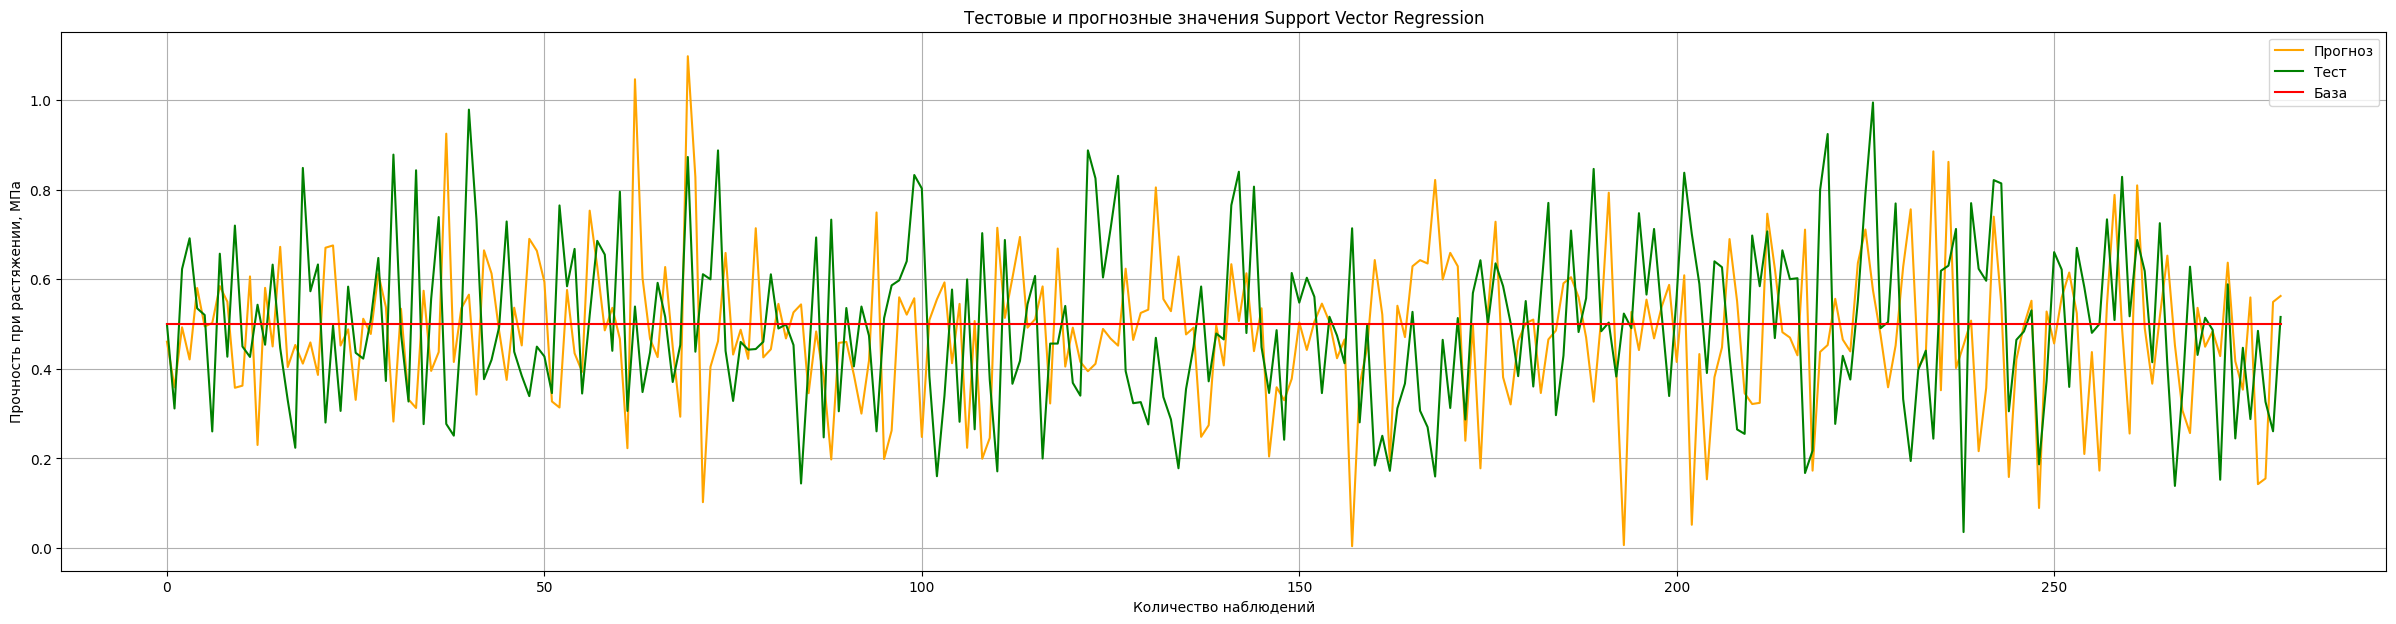

In [150]:
# Визуализация прогнозных и тестовых значений для модели Support Vector Regression (SVR)

plt.figure(figsize=(30, 7)) 
plt.title("Тестовые и прогнозные значения Support Vector Regression") 

# Строим график прогнозных значений модели SVR
plt.plot(y_pred_svr, label="Прогноз", color="orange")

# Строим график фактических тестовых значений
plt.plot(y_test_1.values, label="Тест", color="green")

# Строим график базовой модели
plt.plot(y_1_pred_psi, label="База", color="red")

# Добавляем подписи для осей
plt.xlabel("Количество наблюдений")  # Ось X - количество наблюдений
plt.ylabel("Прочность при растяжении, МПа")  # Ось Y - прочность при растяжении

# Добавляем легенду для различения графиков
plt.legend()

# Включаем сетку для улучшения визуализации
plt.grid(True)

# Отображаем график
plt.show()
